In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("NYPD_Complaint_Data_2017-21.csv")
data.head(5)

C:\Users\david\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,216044876,01/01/2017,11:00:00,08/20/2018,12:00:00,109.0,12/31/2019,116,SEX CRIMES,179.0,...,M,NaN,40.762334,-73.826917,"(40.76233421800004, -73.82691730799998)",PATROL BORO QUEENS NORTH,NaN,<18,ASIAN / PACIFIC ISLANDER,F
1,112025807,01/01/2017,09:00:00,09/01/2019,09:00:00,13.0,12/06/2019,233,SEX CRIMES,175.0,...,M,NaN,40.736698,-73.983316,"(40.736698070000045, -73.98331602599995)",PATROL BORO MAN SOUTH,NaN,45-64,WHITE HISPANIC,M
2,669902330,01/01/2017,00:01:00,12/31/2017,23:59:00,114.0,11/26/2019,233,SEX CRIMES,175.0,...,M,NaN,40.769306,-73.915508,"(40.76930608700008, -73.91550817999997)",PATROL BORO QUEENS NORTH,NaN,<18,BLACK,F
3,579530319,01/01/2017,00:00:00,12/01/2019,00:00:00,71.0,11/30/2019,112,THEFT-FRAUD,739.0,...,NaN,NaN,40.665023,-73.957114,"(40.66502269100005, -73.95711436799998)",PATROL BORO BKLYN SOUTH,NaN,25-44,BLACK,M
4,232211816,01/01/2017,00:01:00,12/31/2017,23:00:00,61.0,11/26/2019,112,THEFT-FRAUD,739.0,...,NaN,NaN,40.607011,-73.964718,"(40.607011439000075, -73.96471823499998)",PATROL BORO BKLYN SOUTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,M


In [3]:
data = data.drop(['CMPLNT_TO_TM', 'LOC_OF_OCCUR_DESC','TRANSIT_DISTRICT','PARKS_NM','HADEVELOPT', 
                  'HOUSING_PSA', 'STATION_NAME'], axis=1)

In [4]:
## General NYC population by year (2017-2021) based on 1 yr ACS surveys
nyc = [8622698, 8398748, 8336817, 8804190, 8804190]

In [5]:
data["PATROL_BORO"].unique()


array(['PATROL BORO QUEENS NORTH', 'PATROL BORO MAN SOUTH',
       'PATROL BORO BKLYN SOUTH', 'PATROL BORO BRONX',
       'PATROL BORO QUEENS SOUTH', 'PATROL BORO BKLYN NORTH',
       'PATROL BORO STATEN ISLAND', 'PATROL BORO MAN NORTH', nan],
      dtype=object)

In [6]:
borough = []
for i in range(len(data["PATROL_BORO"])):
    if data["PATROL_BORO"][i]=='PATROL BORO QUEENS NORTH' or data["PATROL_BORO"][i]=='PATROL BORO QUEENS SOUTH':
        borough.append('queens')
    elif data["PATROL_BORO"][i]=='PATROL BORO BKLYN SOUTH' or data["PATROL_BORO"][i]=='PATROL BORO BKLYN NORTH':
        borough.append('brooklyn')
    elif data["PATROL_BORO"][i]=='PATROL BORO MAN SOUTH' or data["PATROL_BORO"][i]=='PATROL BORO MAN NORTH':
        borough.append('manhattan')
    elif data["PATROL_BORO"][i]=='PATROL BORO BRONX':
        borough.append('bronx')
    elif data["PATROL_BORO"][i]=='PATROL BORO STATEN ISLAND':
        borough.append('staten')
    else:
        borough.append('NA')
data["borough"] = borough

In [7]:
data['CMPLNT_FR_DT'] = data['CMPLNT_FR_DT'].astype(str)
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'].astype(str), format='%m/%d/%Y') 
data['date'] = pd.to_datetime(data['CMPLNT_FR_DT'],format='%m%Y', errors='coerce').dt.to_period('m')
data['year'] = data['date'].dt.strftime('%Y')
data['date'] = data['date'].dt.strftime('%Y%m')

In [44]:
crime_num = pd.DataFrame(data.value_counts(['date', 'borough']))

In [45]:
crime_num = crime_num.reset_index()
crime_num = crime_num.rename(columns={0: "crimes"})

In [46]:
#crime_num = crime_num.drop('index', axis=1)
crime_num.head()
#data = pd.merge(left=data, right=crime_num, left_on='date', right_on='index')

,date,borough,crimes
0,201707,brooklyn,12502
1,201807,brooklyn,12453
2,201808,brooklyn,12339
3,201708,brooklyn,12303
4,201805,brooklyn,12233


In [65]:
a = pd.DataFrame(data.value_counts(['date','borough']))
a.groupby('borough').mean()


,0
borough,
NA,27.416667
bronx,8181.208333
brooklyn,10867.250000
manhattan,9136.750000
queens,7509.750000
staten,1614.041667


In [66]:
bor = ['Bronx', ' Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
val = [8181.21,10867,9136,7509.75,1614.04 ]
pd.DataFrame({'Borough':bor, 'Average Monthly Crime Volume':val})

,Borough,Average Monthly Crime Volume
0,Bronx,8181.21
1,Brooklyn,10867.00
2,Manhattan,9136.00
3,Queens,7509.75
4,Staten Island,1614.04


In [ ]:
################################################################################################################################

In [45]:
crime_num

,year,0,volume
0,2017,467809,467809
1,2018,461904,461904
2,2019,457543,457543
3,2020,404892,404892


In [46]:
crime_num = pd.DataFrame(data.value_counts(['year']))
crime_num = crime_num.reset_index()
crime_num['volume'] = crime_num[0]
#crime_num['volume'].plot.bar(y = 'year')

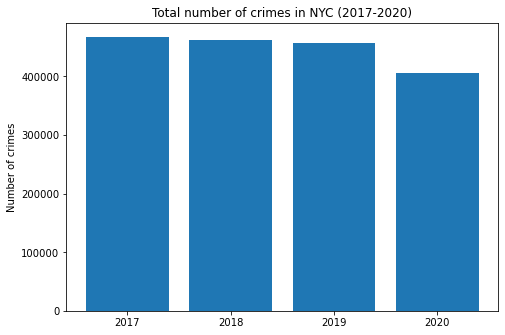

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
year = ['2017', '2018', '2019', '2020']
students = [467809, 461904, 457543, 404892]
ax.bar(year,students)
plt.title('Total number of crimes in NYC (2017-2020)')
plt.ylabel('Number of crimes')
plt.show()

In [ ]:
################################################################################################################################

In [47]:
data.head(3)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,borough,date,year
0,216044876,2017-01-01,11:00:00,08/20/2018,109.0,12/31/2019,116,SEX CRIMES,179.0,AGGRAVATED SEXUAL ASBUSE,...,40.762334,-73.826917,"(40.76233421800004, -73.82691730799998)",PATROL BORO QUEENS NORTH,<18,ASIAN / PACIFIC ISLANDER,F,queens,201701,2017
1,112025807,2017-01-01,09:00:00,09/01/2019,13.0,12/06/2019,233,SEX CRIMES,175.0,"SEXUAL ABUSE 3,2",...,40.736698,-73.983316,"(40.736698070000045, -73.98331602599995)",PATROL BORO MAN SOUTH,45-64,WHITE HISPANIC,M,manhattan,201701,2017
2,669902330,2017-01-01,00:01:00,12/31/2017,114.0,11/26/2019,233,SEX CRIMES,175.0,"SEXUAL ABUSE 3,2",...,40.769306,-73.915508,"(40.76930608700008, -73.91550817999997)",PATROL BORO QUEENS NORTH,<18,BLACK,F,queens,201701,2017


In [48]:
data["borough_time"] = data['date']+data['borough']
crime_num["time_borough"] = crime_num['date']+crime_num['borough']
data = pd.merge(left=data, right=crime_num, left_on='borough_time', right_on='time_borough')

In [49]:
### 2020 & 2021 population based on 2020 census data, 2017-2019 is based on 1 yr ACS survey for respective year
bor = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten"]
year = [2017, 2018, 2019, 2020, 2021]
manhattan = [1664727, 1628701, 1628706, 1694251, 1694251]
brooklyn = [2648771, 2582830, 2559903, 2736074, 2736074]
queens = [2358582, 2278906, 2253858, 2405464, 2405464]
bronx = [1471160, 1432132, 1408207, 1472654, 1472654]
staten = [479458, 476179, 476143, 495747]

In [50]:
data['location_yr'] = data['year'] + data['borough_x']

In [51]:
data['location_yr'].unique()

array(['2017queens', '2017manhattan', '2017brooklyn', '2017bronx',
       '2017staten', '2017NA', '2018manhattan', '2018queens',
       '2018brooklyn', '2018bronx', '2018staten', '2018NA', '2019bronx',
       '2019queens', '2019brooklyn', '2019manhattan', '2019staten',
       '2019NA', '2020bronx', '2020staten', '2020queens', '2020manhattan',
       '2020brooklyn', '2020NA'], dtype=object)

In [52]:
###CHECK TO MAKE SURE ORDER IS CORRECT
population = pd.DataFrame(data['location_yr'].unique())
pop = [queens[0], manhattan[0], brooklyn[0], bronx[0], staten[0], 0,
        manhattan[1], queens[1], brooklyn[1], bronx[1], staten[1], 0,
       bronx[2], queens[2], brooklyn[2], manhattan[2],  staten[2], 0,
      bronx[3], staten[3], queens[3], manhattan[3], brooklyn[3], 0]
population['pop'] = pop
population.head(24)

,0,pop
0,2017queens,2358582
1,2017manhattan,1664727
2,2017brooklyn,2648771
3,2017bronx,1471160
4,2017staten,479458
5,2017NA,0
6,2018manhattan,1628701
7,2018queens,2278906
8,2018brooklyn,2582830
9,2018bronx,1432132


In [53]:
data = pd.merge(left=data, right=population, left_on='location_yr', right_on=0)

## Calculate Crime Rate

In [54]:
data.head(3)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,date_x,year,borough_time,date_y,borough_y,crimes,time_borough,location_yr,0,pop
0,216044876,2017-01-01,11:00:00,08/20/2018,109.0,12/31/2019,116,SEX CRIMES,179.0,AGGRAVATED SEXUAL ASBUSE,...,201701,2017,201701queens,201701,queens,7617,201701queens,2017queens,2017queens,2358582
1,669902330,2017-01-01,00:01:00,12/31/2017,114.0,11/26/2019,233,SEX CRIMES,175.0,"SEXUAL ABUSE 3,2",...,201701,2017,201701queens,201701,queens,7617,201701queens,2017queens,2017queens,2358582
2,336910010,2017-01-01,12:00:00,11/14/2019,104.0,11/14/2019,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,...,201701,2017,201701queens,201701,queens,7617,201701queens,2017queens,2017queens,2358582


In [55]:
data = data.drop(['date_x', 0,  'borough_time'], axis=1)

In [56]:
data['crime_rate'] = round((data['crimes']/data['pop'])*100000,2)

In [57]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC',
       'JURIS_DESC', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude',
       'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'borough_x', 'year', 'date_y', 'borough_y', 'crimes', 'time_borough',
       'location_yr', 'pop', 'crime_rate'],
      dtype='object')

In [58]:
data.to_csv('data.csv')

In [23]:
df = data[['crime_rate', 'Latitude', 'Longitude', 'Lat_Lon']]
df.head()

,crime_rate,Latitude,Longitude,Lat_Lon
0,322.95,40.762334,-73.826917,"(40.76233421800004, -73.82691730799998)"
1,322.95,40.769306,-73.915508,"(40.76930608700008, -73.91550817999997)"
2,322.95,40.717372,-73.900820,"(40.71737189700008, -73.90081976999993)"
3,322.95,40.679700,-73.776047,"(40.67970040800003, -73.77604736799998)"
4,322.95,40.745253,-73.870063,"(40.74525274100006, -73.87006286999997)"


## Set up data for initital regressions, look at links below
## Create data frame with additional economic indicators from census data as done before
## Explore other models to run with larger dataset

#### Links
https://towardsdatascience.com/how-to-convert-a-shapefile-to-a-dataframe-in-python-a6ca9a893504

https://datascience.stackexchange.com/questions/23651/can-gps-coordinates-latitude-and-longitude-be-used-as-features-in-a-linear-mod

https://discuss.analyticsvidhya.com/t/how-to-handle-lat-lon-features-in-a-model/27771/3

https://stackoverflow.com/questions/50423489/whats-the-best-way-of-using-gps-coordinate-in-regression-model

https://stackoverflow.com/questions/47372626/how-to-use-lat-long-as-features-in-regression-prediction-task  (likely not useful)

https://medium.com/@khadijamahanga/using-latitude-and-longitude-data-in-my-machine-learning-problem-541e2651e08c

https://www.quora.com/What-is-the-best-way-to-treat-longitude-latitude-features-in-a-machine-learning-predictive-model

## Initial Regression using only GPS coordinates

# Look at this link: https://stackoverflow.com/questions/42511056/how-can-one-use-kneighborsregressor-with-haversine-metric

Output in radians as well?

In [24]:
from math import radians
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
df['Lat'] = df['Latitude'].apply(radians)
df['Long'] = df['Longitude'].apply(radians)
df.head(3)

<ipython-input-25-6959c20a05d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lat'] = df['Latitude'].apply(radians)
<ipython-input-25-6959c20a05d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Long'] = df['Longitude'].apply(radians)


,crime_rate,Latitude,Longitude,Lat_Lon,Lat,Long
0,322.95,40.762334,-73.826917,"(40.76233421800004, -73.82691730799998)",0.711437,-1.288523
1,322.95,40.769306,-73.915508,"(40.76930608700008, -73.91550817999997)",0.711559,-1.290069
2,322.95,40.717372,-73.900820,"(40.71737189700008, -73.90081976999993)",0.710652,-1.289813


In [26]:
df = df.dropna()
df.head(3)

,crime_rate,Latitude,Longitude,Lat_Lon,Lat,Long
0,322.95,40.762334,-73.826917,"(40.76233421800004, -73.82691730799998)",0.711437,-1.288523
1,322.95,40.769306,-73.915508,"(40.76930608700008, -73.91550817999997)",0.711559,-1.290069
2,322.95,40.717372,-73.900820,"(40.71737189700008, -73.90081976999993)",0.710652,-1.289813


In [27]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [28]:
X = df[['Lat', 'Long']].values
y = df['crime_rate'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [30]:
int((len(df)*.70)**.5) ### to determine K for kNN, we do length of data times size of training set and take the sqrt of this

1119

In [31]:
nbrs = KNeighborsRegressor(n_neighbors=201, weights='distance', metric='haversine')

nbrs.fit(X_train, y_train)

y_pred = nbrs.predict(X_test)

In [33]:
nbrs.score(X_test,y_test)

0.8009913200680213

In [34]:
y_pred

array([569.48581395, 558.85504587, 583.35648148, ..., 565.17625   ,
       552.8907563 , 591.47333333])

In [35]:
y_test

array([570.27, 571.53, 560.99, ..., 579.17, 623.38, 495.46])